# G2M Insight for Cab Investment Firm
##### Maria Contractor

## 1. Importing and Understanding Data

In [236]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

warnings.filterwarnings("ignore")

In [5]:
cab_data = pd.read_csv('Cab_Data.csv')
cab_data.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [31]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [6]:
city_data = pd.read_csv('City.csv')
city_data.head(5)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [34]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [7]:
transaction_data = pd.read_csv('Transaction_ID.csv')
transaction_data.head(5)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [38]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [8]:
customer_data = pd.read_csv('Customer_Id.csv')
customer_data.head(5)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [42]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


## 2. Altering Datatypes

###### Date of Travel - Cab Data

In [50]:
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'], format='%d/%m/%Y')

In [51]:
cab_data.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


In [52]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
 7   Profit          359392 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 21.9+ MB


###### Population & Users - City Data

In [54]:
city_data.replace(',','', regex=True, inplace=True)

In [55]:
city_data['Population']=city_data['Population'].astype('float')

In [56]:
city_data['Users']=city_data['Users'].astype('float')

In [57]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        20 non-null     object 
 1   Population  20 non-null     float64
 2   Users       20 non-null     float64
dtypes: float64(2), object(1)
memory usage: 608.0+ bytes


## 3. Merge All Data and Add Necessary Info

###### Add a Profit Section to City Data

In [58]:
cab_data['Profit'] = cab_data['Price Charged'] - cab_data['Cost of Trip']
cab_data.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


###### Merge all data together

In [106]:
all_data = cab_data.merge(transaction_data, on = 'Transaction ID').merge(customer_data, on = 'Customer ID').merge(city_data, on = 'City')
all_data.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290,Card,Male,28,10813,814885.0,24701.0
1,10351127,2018-07-23,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,29290,Cash,Male,28,10813,814885.0,24701.0
2,10412921,2018-11-25,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,29290,Card,Male,28,10813,814885.0,24701.0
3,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,27703,Card,Male,27,9237,814885.0,24701.0
4,10320494,2018-04-23,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,27703,Card,Male,27,9237,814885.0,24701.0


## 4. Analysis/ Visualizations

In [60]:
all_data[all_data.duplicated()]

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users


In [61]:
all_data.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Profit                0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

###### This shows that there is NO duplicated data or NA values in any of the sets

### Correlation

In [62]:
correlations = all_data.corr()
correlations

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Age,Income (USD/Month),Population,Users
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,-0.087130,-0.016912,-0.001267,-0.001570,0.023868,0.013526
KM Travelled,-0.001429,1.000000,0.835753,0.981848,0.462768,0.000389,-0.000369,-0.000544,-0.002311,-0.000428
Price Charged,-0.052902,0.835753,1.000000,0.859812,0.864154,-0.177324,-0.003084,0.003228,0.326589,0.281061
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,0.486056,0.003077,-0.000189,-0.000633,0.015108,0.023628
Profit,-0.087130,0.462768,0.864154,0.486056,1.000000,-0.306527,-0.005093,0.006148,0.544079,0.457758
Customer ID,-0.016912,0.000389,-0.177324,0.003077,-0.306527,1.000000,-0.004735,-0.013608,-0.647052,-0.610742
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.005093,-0.004735,1.000000,0.003907,-0.009002,-0.005906
Income (USD/Month),-0.001570,-0.000544,0.003228,-0.000633,0.006148,-0.013608,0.003907,1.000000,0.011868,0.010464
Population,0.023868,-0.002311,0.326589,0.015108,0.544079,-0.647052,-0.009002,0.011868,1.000000,0.915490
Users,0.013526,-0.000428,0.281061,0.023628,0.457758,-0.610742,-0.005906,0.010464,0.915490,1.000000


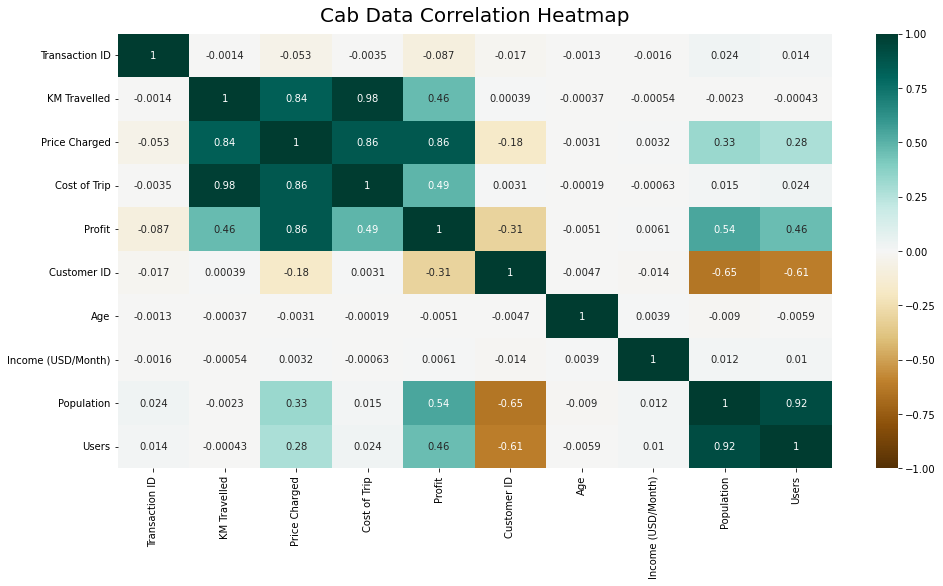

In [84]:
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(all_data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Cab Data Correlation Heatmap', fontdict={'fontsize':20}, pad=12);

#### From this data, we can see that there is a very high correlation betwen cost of trip and km travelled & population and users

### Company Distribution

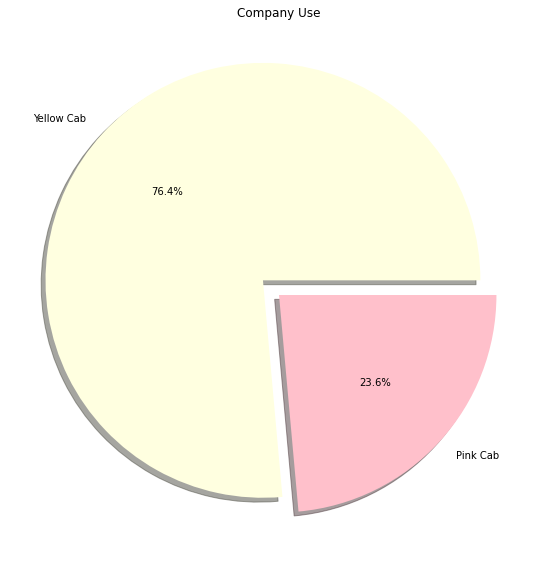

In [171]:
company_dist = all_data['Company'].value_counts()
labels = company_dist.index
explode = (0.1, 0)
# Create a pie chart
colors = ['lightyellow', 'pink']

plt.figure(figsize=(10, 10))
plt.pie(company_dist, labels = labels, colors = colors, explode = explode, shadow = True, autopct='%1.1f%%')
plt.title('Company Use')
plt.show()

## 5. Hypotheses & Investigation

##### Hypothesis 1
Females are more likely to use the Yellow Cab than the Pink Cab

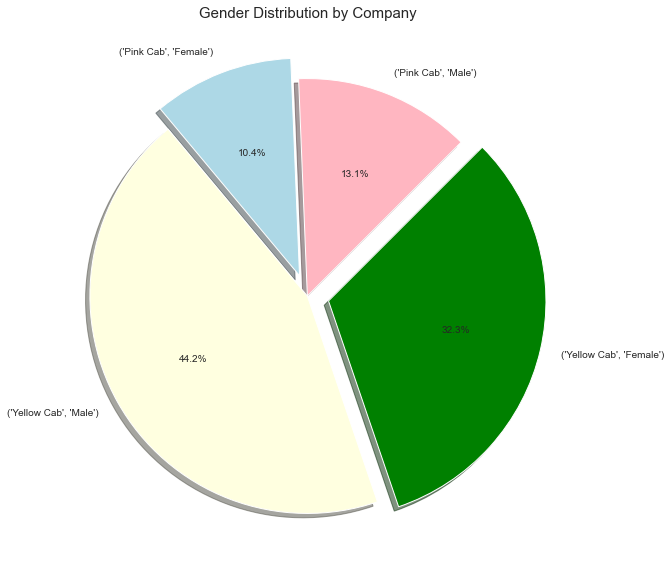

In [232]:
gender_for_company = all_data.groupby(['Company'])['Gender'].value_counts()
labels = gender_for_company.index
size = gender_for_company.values 
explode = (0, 0.1, 0, 0.1)
colors = ['lightpink', 'lightblue', 'lightyellow', 'green']

plt.figure(figsize = (10, 10))
plt.pie(size, labels = labels, colors = colors, autopct ='%1.1f%%', explode = explode, shadow = True, startangle = 45,)

plt.title('Gender Distribution by Company', fontsize = 15)
plt.show()

#### Conclusion
From the pie chart shown above, there is evidence that more females prefer the yellow cab (32.3%) then the pink cab (10.4%)

##### Hypothesis 2
All riders prefer to pay in card than cash

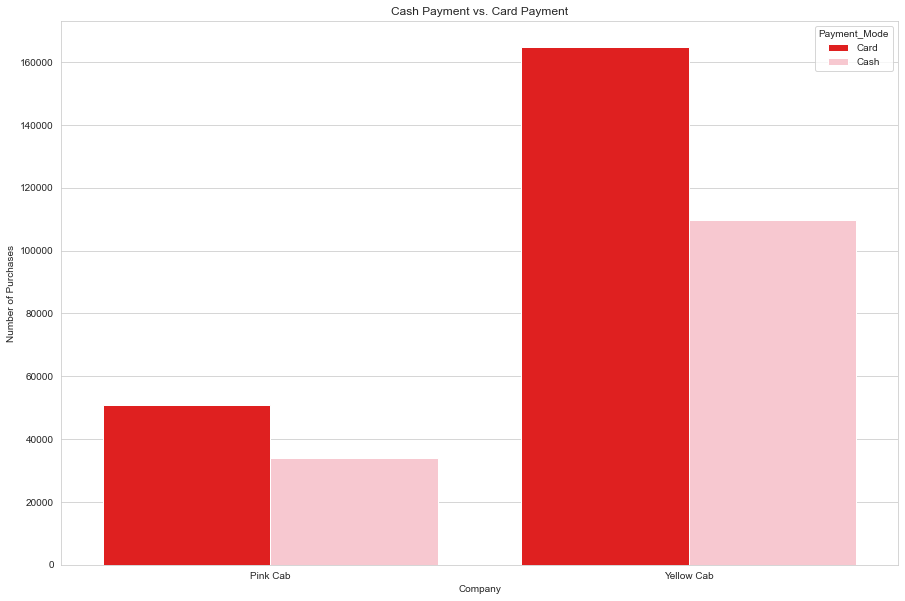

In [250]:
plt.figure(figsize = (15, 10))
plot = sns.countplot(x="Company", hue="Payment_Mode", palette = ['red', 'pink'], data=all_data)
plt.title('Cash Payment vs. Card Payment')
plot.set_xlabel("Company")
plot.set_ylabel("Number of Purchases")
plt.show()

### Conclusion
The overall popularity for any cab ride purchase is through card

##### Hypothesis 3
Those who tend to live in bigger cities have greater use of the cab services

In [277]:
population_per_city = all_data.groupby('City')['Population'].count().sort_values(ascending = False)
population_per_city

City
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: Population, dtype: int64

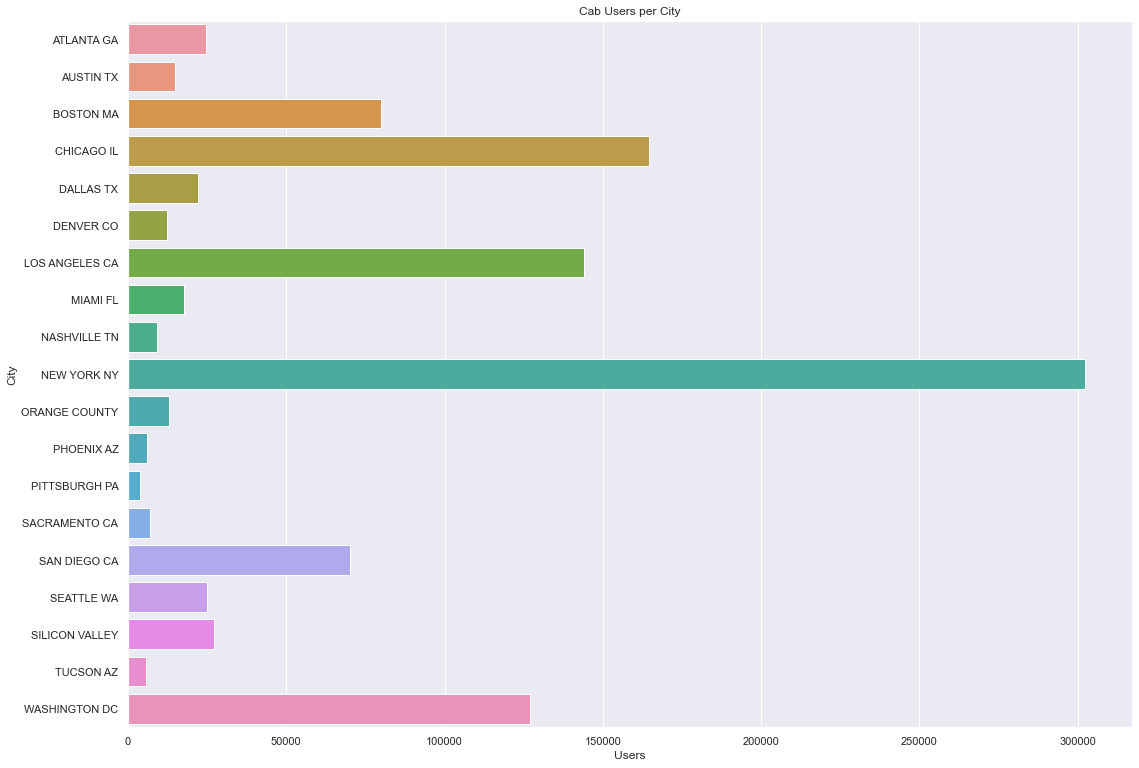

In [278]:
ax = sns.barplot(data = all_data, x = 'Users', y = 'City').set(title = 'Cab Users per City')

### Conclusion
From the barplot, cities with a larger population tend to use the cab services more often than cities with a smaller population

##### Hypothesis 4
The amount of profit increased as the KM travelled increased

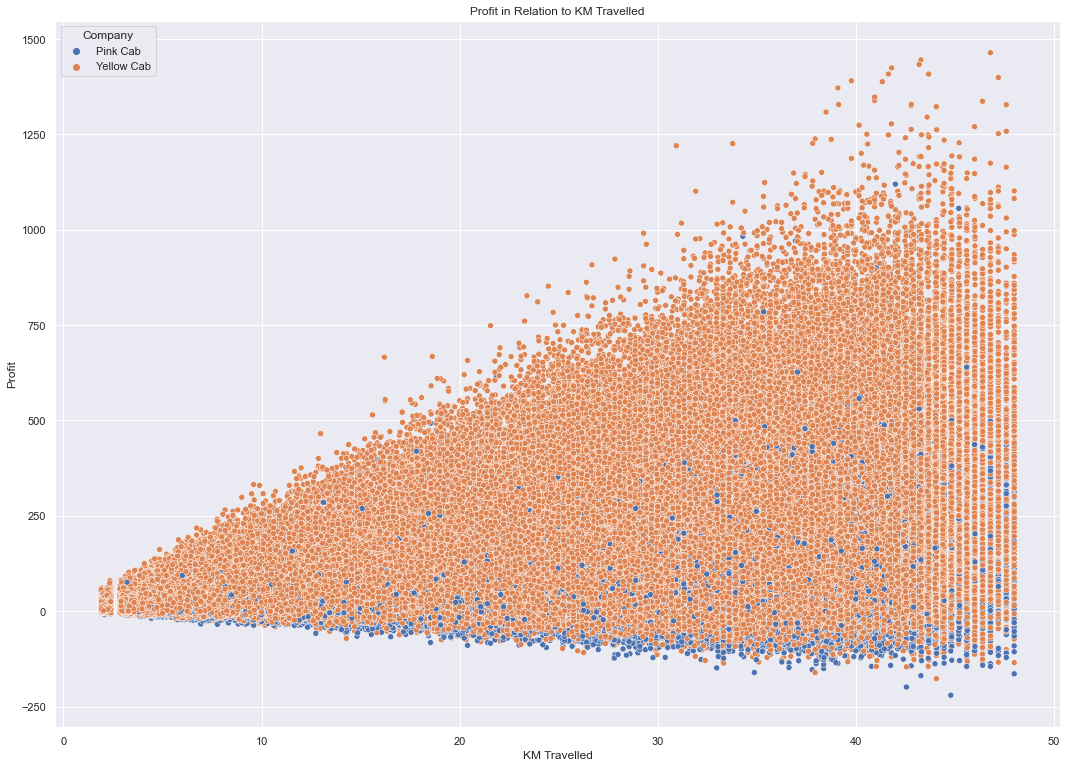

In [289]:
sns.scatterplot(data = all_data, x = "KM Travelled", y = 'Profit', hue = 'Company')
plt.title('Profit in Relation to KM Travelled')
plt.xlabel('KM Travelled')
plt.ylabel('Profit')
plt.show()

### Conclusion
There does not seem to be much of a relationship between profit and the KM travelled between any of the cab companies

##### Hypothesis 5
Age plays a role in cab use

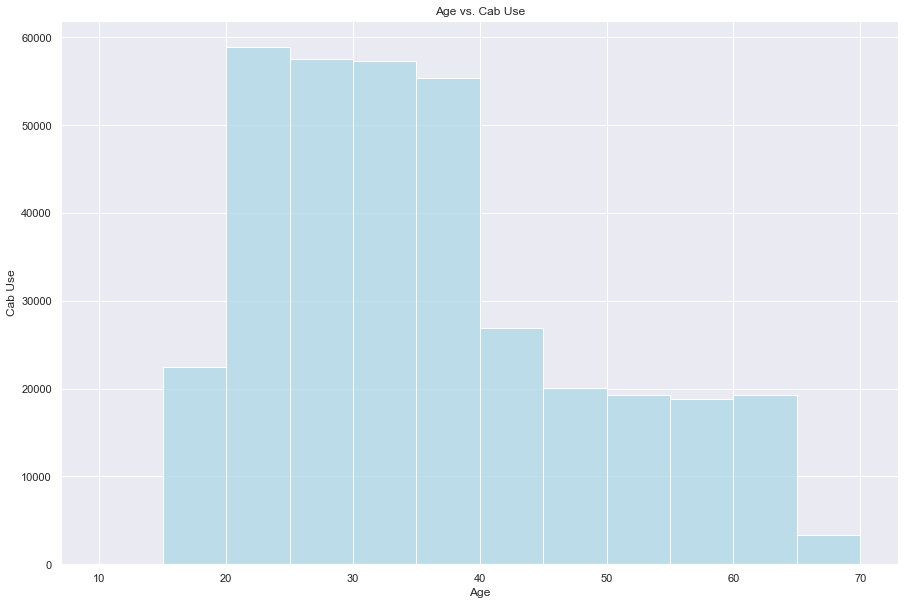

In [298]:
plt.figure(figsize = (15, 10))
sns.histplot( data = all_data['Age'], binrange = [10,70], binwidth = 5, color = "lightblue")
plt.xlabel("Age")
plt.ylabel("Cab Use")
plt.title("Age vs. Cab Use")
plt.show()

### Conclusion
Those who are of ages 20-40 have a much larger cab use than those who are older (45-70)

## 6. Overall Recommendation

### It is recommended for the XYZ Company to invest in the Yellow Cab Company through the Data Report